### Will a Customer Accept the Coupon?

**Project Overview**

The goal of this project is analyze the data using visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data used in this project is from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

### Import Pandas, Matplot, Seaborn, NumPy and Plotly Libraries**

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Data Analysis


1. Read in the `coupons.csv` file.




In [122]:
coupon_data = pd.read_csv('data/coupons.csv')

In [123]:
coupon_data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [124]:
coupon_data.sample(50)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
11301,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,36,Unmarried partner,...,1~3,gt8,gt8,1~3,1,1,0,0,1,0
12105,Work,Alone,Snowy,30,7AM,Coffee House,1d,Female,21,Unmarried partner,...,never,1~3,never,never,1,0,0,1,0,1
10262,Home,Alone,Sunny,80,6PM,Carry out & Take away,1d,Female,31,Married partner,...,gt8,4~8,1~3,less1,1,0,0,0,1,0
1840,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Male,41,Single,...,1~3,1~3,less1,never,1,1,0,0,1,1
6977,No Urgent Place,Kid(s),Snowy,30,6PM,Bar,1d,Male,36,Married partner,...,never,1~3,4~8,never,1,1,0,0,1,1
3657,No Urgent Place,Kid(s),Sunny,55,2PM,Restaurant(<20),1d,Female,31,Married partner,...,1~3,1~3,1~3,less1,1,1,0,0,1,1
8891,No Urgent Place,Friend(s),Sunny,80,10PM,Coffee House,1d,Male,26,Unmarried partner,...,less1,4~8,1~3,less1,1,1,0,0,1,1
452,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,31,Single,...,gt8,gt8,gt8,gt8,1,0,0,0,1,1
8420,No Urgent Place,Partner,Snowy,30,2PM,Coffee House,2h,Male,26,Single,...,1~3,4~8,1~3,4~8,1,1,0,0,1,0
7750,Work,Alone,Sunny,80,7AM,Restaurant(<20),1d,Male,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,1,0,1


2. Investigating the dataset for missing or problematic data.

    2.1 Finding columns with Missing Values

In [127]:
print(coupon_data.iloc[2].isnull())

destination             False
passanger               False
weather                 False
temperature             False
time                    False
coupon                  False
expiration              False
gender                  False
age                     False
maritalStatus           False
has_children            False
education               False
occupation              False
income                  False
car                      True
Bar                     False
CoffeeHouse             False
CarryAway                True
RestaurantLessThan20    False
Restaurant20To50        False
toCoupon_GEQ5min        False
toCoupon_GEQ15min       False
toCoupon_GEQ25min       False
direction_same          False
direction_opp           False
Y                       False
Name: 2, dtype: bool


    2.2 Finding how many missing values in each columns and Sorting the columns in descending order to see what are the columns with highest missing values. 

In [128]:
coupon_data.isnull().sum().sort_values(ascending=False)

car                     12576
CoffeeHouse               217
Restaurant20To50          189
CarryAway                 151
RestaurantLessThan20      130
Bar                       107
destination                 0
passanger                   0
direction_opp               0
direction_same              0
toCoupon_GEQ25min           0
toCoupon_GEQ15min           0
toCoupon_GEQ5min            0
income                      0
occupation                  0
education                   0
has_children                0
maritalStatus               0
age                         0
gender                      0
expiration                  0
coupon                      0
time                        0
temperature                 0
weather                     0
Y                           0
dtype: int64

    2.3 Separate categorical and numerical columns in the data frame

In [129]:
coupon_num_vars = coupon_data.columns[couponData.dtypes != 'object']
coupon_cat_vars = coupon_data.columns[couponData.dtypes == 'object']

print(coupon_num_vars)
print(coupon_cat_vars)

Index(['temperature', 'has_children', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min',
       'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'Y'],
      dtype='object')
Index(['destination', 'passanger', 'weather', 'time', 'coupon', 'expiration',
       'gender', 'age', 'maritalStatus', 'education', 'occupation', 'income',
       'car', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20',
       'Restaurant20To50'],
      dtype='object')


3. Decide what to do about your missing data -- drop, replace, other...

    3.1 Rename the column 'Y' to 'coupon_accepted'

In [134]:
coupon_data = coupon_data.rename(columns={'Y': 'coupon_accepted'})
print(coupon_data)

           destination  passanger weather  temperature  time  \
0      No Urgent Place      Alone   Sunny           55   2PM   
1      No Urgent Place  Friend(s)   Sunny           80  10AM   
2      No Urgent Place  Friend(s)   Sunny           80  10AM   
3      No Urgent Place  Friend(s)   Sunny           80   2PM   
4      No Urgent Place  Friend(s)   Sunny           80   2PM   
...                ...        ...     ...          ...   ...   
12679             Home    Partner   Rainy           55   6PM   
12680             Work      Alone   Rainy           55   7AM   
12681             Work      Alone   Snowy           30   7AM   
12682             Work      Alone   Snowy           30   7AM   
12683             Work      Alone   Sunny           80   7AM   

                      coupon expiration  gender age      maritalStatus  ...  \
0            Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
1               Coffee House         2h  Female  21  Unmarried partner  .

    3.2 Remove duplicates

In [135]:
duplicate = coupon_data[coupon_data.duplicated(keep='last')] #(74, 26)
coupon_data = coupon_data.drop_duplicates()
print("Shape of dataset after removing duplicates:",coupon_data.shape)

Shape of dataset after removing duplicates: (12610, 26)


    3.3 Finding missing values

In [136]:
print('Is there any missing value present or not?',coupon_data.isnull().values.any())
missing_percentage = coupon_data.isnull().sum()*100/len(coupon_data)
missing_value_df = pd.DataFrame({'missing_count': coupon_data.isnull().sum(),'missing_percentage': missing_percentage})
missing_value_df[missing_value_df.missing_count != 0]

Is there any missing value present or not? True


,missing_count,missing_percentage
car,12502,99.143537


    3.4 Filling missing values using mode imputation
        Mode imputation replaces missing values of a categorical feature with the most common value of that feature. while modeling always performs imputation after train test split.

In [137]:
# mode imputation for missing values in data
coupon_data['Bar']=coupon_data['Bar'].fillna(coupon_data['Bar'].value_counts().index[0])
coupon_data['CoffeeHouse']=coupon_data['CoffeeHouse'].fillna(coupon_data['CoffeeHouse'].value_counts().index[0])
coupon_data['CarryAway']=coupon_data['CarryAway'].fillna(coupon_data['CarryAway'].value_counts().index[0])
coupon_data['RestaurantLessThan20']=coupon_data['RestaurantLessThan20'].fillna(coupon_data['RestaurantLessThan20'].value_counts().index[0])
coupon_data['Restaurant20To50']=coupon_data['Restaurant20To50'].fillna(coupon_data['Restaurant20To50'].value_counts().index[0])

In [ ]:
3.4 Finding missing values again after filling the data

In [138]:
print('Is there any missing value present or not?',coupon_data.isnull().values.any())
missing_percentage = coupon_data.isnull().sum()*100/len(coupon_data)
missing_value_df = pd.DataFrame({'missing_count': coupon_data.isnull().sum(),'missing_percentage': missing_percentage})
missing_value_df[missing_value_df.missing_count != 0]

Is there any missing value present or not? True


,missing_count,missing_percentage
car,12502,99.143537


     3.1 Removing rows and columns where all values are missing

In [139]:
coupon_data = coupon_data.dropna(how='all').dropna(how='all', axis=1)
print(coupon_data)

           destination  passanger weather  temperature  time  \
0      No Urgent Place      Alone   Sunny           55   2PM   
1      No Urgent Place  Friend(s)   Sunny           80  10AM   
2      No Urgent Place  Friend(s)   Sunny           80  10AM   
3      No Urgent Place  Friend(s)   Sunny           80   2PM   
4      No Urgent Place  Friend(s)   Sunny           80   2PM   
...                ...        ...     ...          ...   ...   
12679             Home    Partner   Rainy           55   6PM   
12680             Work      Alone   Rainy           55   7AM   
12681             Work      Alone   Snowy           30   7AM   
12682             Work      Alone   Snowy           30   7AM   
12683             Work      Alone   Sunny           80   7AM   

                      coupon expiration  gender age      maritalStatus  ...  \
0            Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
1               Coffee House         2h  Female  21  Unmarried partner  .

4. What proportion of the total observations chose to accept the coupon? 



In [140]:
# Select the column that contains the coupon acceptance data
coupon_accepted = coupon_data['coupon_accepted']

# Use the value_counts() method to count the number of observations in each category
counts = coupon_accepted.value_counts()

# Divide the number of observations in the "Accepted" category by the total number of observations
proportion_accepted = counts[1] / counts.sum()

# Multiply the result by 100 to get the percentage
percentage_accepted = proportion_accepted * 100

# Print the percentage
print(percentage_accepted)


56.75654242664552


    Based on the above analysis: 56.84% Customer has accepted the Coupon.

5. Using a bar plot to visualize the `coupon` column.

[Text(0, 0, 'Restaurant(<20)'),
 Text(1, 0, 'Coffee House'),
 Text(2, 0, 'Carry out & Take away'),
 Text(3, 0, 'Bar'),
 Text(4, 0, 'Restaurant(20-50)')]

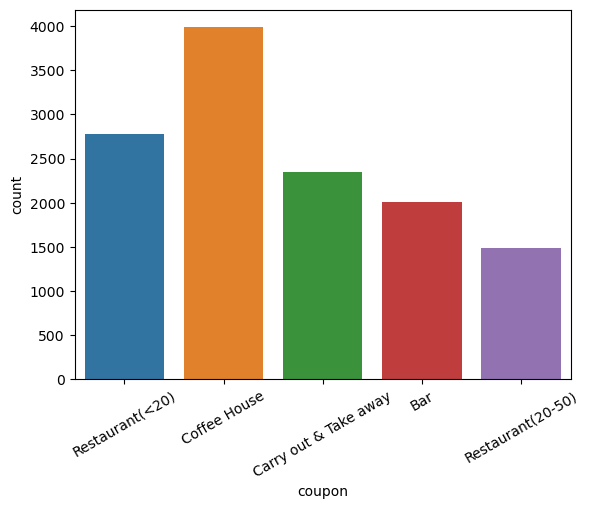

In [147]:
fig = sns.countplot(x="coupon", data = coupon_data)
# Rotate the labels as they would overlap otherwise
fig.set_xticklabels(labels=coupon_data["coupon"].unique(),rotation=30)

6. Using a histogram to visualize the temperature column.

Text(0.5, 1.0, 'Histogram of Temperature')

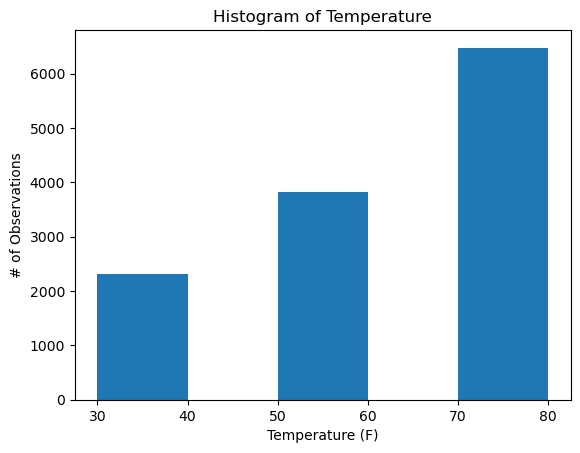

In [149]:
n_bins = 5    
plt.hist(coupon_data["temperature"], n_bins, histtype ='bar')
plt.xlabel('Temperature (F)')
plt.ylabel('# of Observations')
plt.title('Histogram of Temperature')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [144]:
bar_coupon_data = coupon_data[coupon_data['coupon'] == 'Bar']

In [145]:
print(f'Total number of records with Bar Coupon: {len(bar_coupon_data)} rows.')

Total number of records with Bar Coupon: 2010 rows.


In [153]:
bar_coupon_data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,coupon_accepted
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [154]:
# Select the column that contains the coupon acceptance data
bar_coupon_accepted = bar_coupon_data['coupon_accepted']

# Use the value_counts() method to count the number of observations in each category
bar_counts = bar_coupon_accepted.value_counts()

# Divide the number of observations in the "Accepted" category by the total number of observations
bar_proportion_accepted = bar_counts[1] / bar_counts.sum()

# Multiply the result by 100 to get the percentage
bar_percentage_accepted = bar_proportion_accepted * 100

# Print the percentage
print(bar_percentage_accepted)

40.99502487562189


    Based on the above analysis: 41 % Customer has accepted the Bar Coupon.

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


[Text(0, 0, 'never'),
 Text(1, 0, 'less1'),
 Text(2, 0, '1~3'),
 Text(3, 0, 'gt8'),
 Text(4, 0, '4~8')]

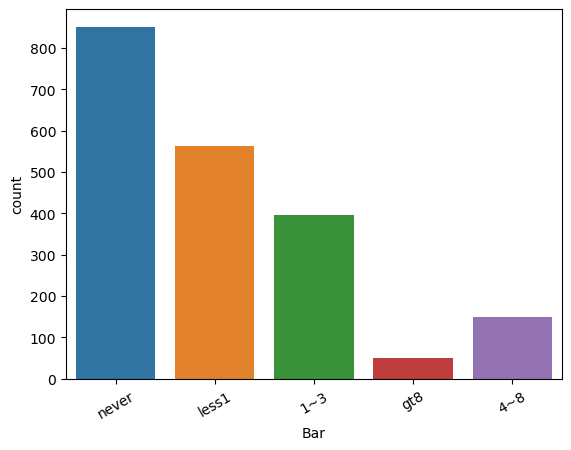

In [156]:
fig = sns.countplot(x="Bar", data = bar_coupon_data)
# Rotate the labels as they would overlap otherwise
fig.set_xticklabels(labels=bar_coupon_data["Bar"].unique(),rotation=30)

In [179]:
bar_visiters = bar_coupon_data[["Bar","coupon_accepted"]]
bar_visiters.loc[(bar_visiters.Bar == "never") | (bar_visiters.Bar == "1~3") | (bar_visiters.Bar == "less1"), "Bar"] = "<= 3 Times"
bar_visiters.loc[(bar_visiters.Bar == "4~8") | (bar_visiters.Bar == "gt8"), "Bar"] = "> 3 Times"
bar_visiters = bar_visiters.groupby("Bar").agg({"Bar": 'size', 'coupon_accepted':'sum'})
bar_visiters.rename(columns={"Bar":"total_count","coupon_accepted":"acceptance_count"},inplace=True)
bar_visiters = bar_visiters.reset_index()
bar_visiters["acceptance_percentage"] = bar_visiters["acceptance_count"]/bar_visiters["total_count"]*100
bar_visiters

,Bar,total_count,acceptance_count,acceptance_percentage
0,<= 3 Times,1811,671,37.051353
1,> 3 Times,199,153,76.884422


([0, 1], [Text(0, 0, '<= 3 Times'), Text(1, 0, '> 3 Times')])

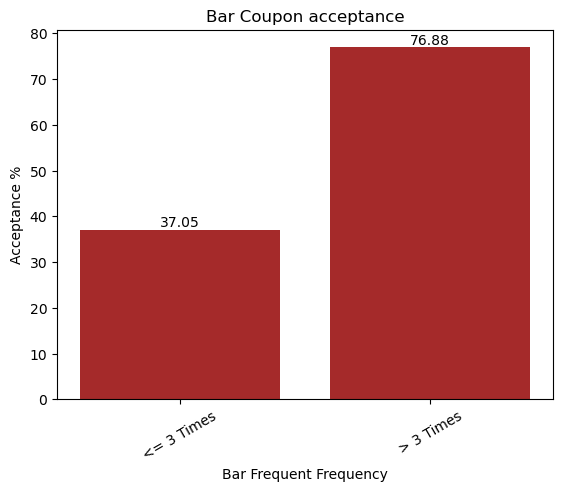

In [194]:
# Plot a bar graph to compare the 2 groups: 
bars = plt.bar(bar_visiters["Bar"],bar_visiters["acceptance_percentage"], color = 'brown')
plt.bar_label(bars,np.round(bar_visiters["acceptance_percentage"],decimals=2))
plt.xlabel("Bar Frequent Frequency")
plt.ylabel("Acceptance %")
plt.title("Bar Coupon acceptance")
plt.xticks(rotation=30)

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [187]:
bar_coupon_data_age = bar_coupon_data[["age","Bar","coupon_accepted"]].copy()
bar_coupon_data_age["age"] = bar_coupon_data_age["age"].str.replace('50plus','50').str.replace("below21","20")
bar_coupon_data_age['age'] = pd.to_numeric(bar_coupon_data_age['age'])
bar_coupon_data_age['25_older_visit_bar_once_or_more'] = np.where(
    (bar_coupon_data_age['age'] > 25) & 
    ((bar_coupon_data_age['Bar'] == '1~3') | (bar_coupon_data_age['Bar'] == '4~8') | (bar_coupon_data_age['Bar'] == 'gt8'))
    , "Yes", "No")
#bar_coupon_data_age.sample(5)
bar_coupon_data_age = bar_coupon_data_age.groupby("25_older_visit_bar_once_or_more").agg({"25_older_visit_bar_once_or_more": 'size', 'coupon_accepted':'sum'})
bar_coupon_data_age.rename(columns={"25_older_visit_bar_once_or_more":"total_count","coupon_accepted":"acceptance_count"},inplace=True)
bar_coupon_data_age = bar_coupon_data_age.reset_index()
bar_coupon_data_age["acceptance_percentage"] = bar_coupon_data_age["acceptance_count"]/bar_coupon_data_age["total_count"]*100
bar_coupon_data_age

,25_older_visit_bar_once_or_more,total_count,acceptance_count,acceptance_percentage
0,No,1590,532,33.459119
1,Yes,420,292,69.523810


([0, 1], [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

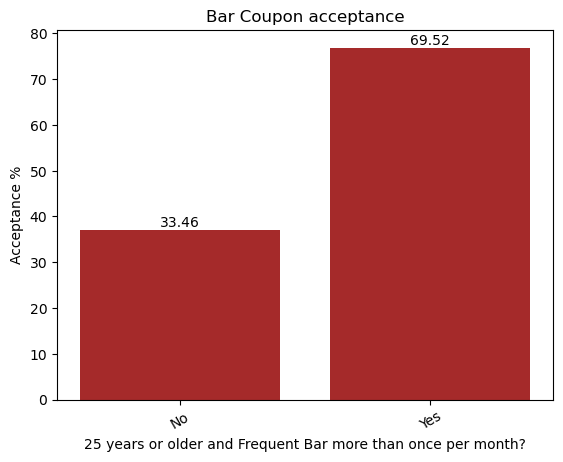

In [195]:
bars = plt.bar(bar_coupon_data_age["25_older_visit_bar_once_or_more"],bar_visiters["acceptance_percentage"], color = 'brown')
plt.bar_label(bars,np.round(bar_coupon_data_age["acceptance_percentage"],decimals=2))
plt.xlabel("25 years or older and Frequent Bar more than once per month?")
plt.ylabel("Acceptance %")
plt.title("Bar Coupon acceptance")
plt.xticks(rotation=30)

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [198]:
bar_coupon_data_kid = bar_coupon_data[["passanger","Bar","occupation","coupon_accepted"]].copy()
bar_coupon_data_kid['candidate'] = np.where(
    (bar_coupon_data_kid['passanger'] != 'Kid(s)') & # drivers with no kid passengers
    ((bar_coupon_data_kid['Bar'] == '1~3') | (bar_coupon_data_kid['Bar'] == '4~8') | (bar_coupon_data_kid['Bar'] == 'gt8')) & # Go to bar > once a month
    (bar_coupon_data_kid['occupation'] != 'Farming Fishing & Forestry') # Are not in Farming, fishing, or forestry occupation
    , "Yes", "No")
#bar_coupon_data_kid.sample(5)
bar_coupon_data_kid = bar_coupon_data_kid.groupby("candidate").agg({"candidate": 'size', 'coupon_accepted':'sum'})
bar_coupon_data_kid.rename(columns={"candidate":"total_count","coupon_accepted":"acceptance_count"},inplace=True)
bar_coupon_data_kid = bar_coupon_data_kid.reset_index()
bar_coupon_data_kid["acceptance_percentage"] = bar_coupon_data_kid["acceptance_count"]/bar_coupon_data_kid["total_count"]*100
bar_coupon_data_kid

,candidate,total_count,acceptance_count,acceptance_percentage
0,No,1459,431,29.540781
1,Yes,551,393,71.324864


(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

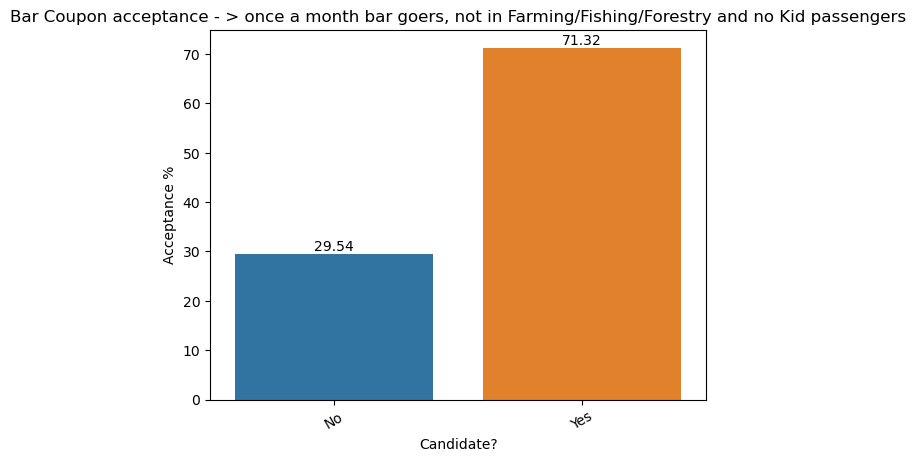

In [222]:
#Plot a graph to represent the acceptance
sns.barplot(bar_coupon_data_kid,x="candidate",y="acceptance_percentage")
plt.bar_label(bars,np.round(bar_coupon_data_kid["acceptance_percentage"],decimals=2))
plt.xlabel("Candidate?")
plt.ylabel("Acceptance %")
plt.title("Bar Coupon acceptance - > once a month bar goers, not in Farming|Fishing|Forestry and no Kid passengers")
plt.xticks(rotation=30)

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [201]:
bar_coupon_data_copy = bar_coupon_data[["maritalStatus","age","income","passanger","Bar","occupation","RestaurantLessThan20","coupon_accepted"]].copy()

#Cleanup Age column and convert it to numeric:
bar_coupon_data_copy["age"] = bar_coupon_data_copy["age"].str.replace('50plus','50').str.replace("below21","20")
bar_coupon_data_copy['age'] = pd.to_numeric(bar_coupon_data_copy['age'])

#Let us split the income column into 2 numeric columns: lower_income and upper_income: 
bar_coupon_data_copy["income"] = bar_coupon_data_copy["income"].str.replace("$","")
# Let us first handle the 2 boundary conditions ""> 100,000" and "< 12,500"
bar_coupon_data_copy["income"] = bar_coupon_data_copy["income"].str.replace('100000 or More','100000 - 101000').str.replace("Less than 12500","0 - 12500")
bar_coupon_data_copy[['lower_income','upper_income']] = bar_coupon_data_copy.income.str.split(" - ", expand = True)
bar_coupon_data_copy['lower_income'] = pd.to_numeric(bar_coupon_data_copy['lower_income'])
bar_coupon_data_copy['upper_income'] = pd.to_numeric(bar_coupon_data_copy['upper_income'])
bar_coupon_data_copy

,maritalStatus,age,income,passanger,Bar,occupation,RestaurantLessThan20,coupon_accepted,lower_income,upper_income
9,Unmarried partner,21,37500 - 49999,Kid(s),never,Unemployed,4~8,0,37500,49999
13,Unmarried partner,21,37500 - 49999,Alone,never,Unemployed,4~8,1,37500,49999
17,Unmarried partner,21,37500 - 49999,Alone,never,Unemployed,4~8,0,37500,49999
24,Single,21,62500 - 74999,Friend(s),never,Architecture & Engineering,4~8,1,62500,74999
35,Single,21,62500 - 74999,Alone,never,Architecture & Engineering,4~8,1,62500,74999
...,...,...,...,...,...,...,...,...,...,...
12663,Single,26,75000 - 87499,Friend(s),never,Sales & Related,4~8,0,75000,87499
12664,Single,26,75000 - 87499,Friend(s),never,Sales & Related,4~8,0,75000,87499
12667,Single,26,75000 - 87499,Alone,never,Sales & Related,4~8,0,75000,87499
12670,Single,26,75000 - 87499,Partner,never,Sales & Related,4~8,0,75000,87499


In [202]:
# Now, let us filter the interested candidates
bar_coupon_data_copy['candidate'] = np.where(
    (
        ((bar_coupon_data_copy['Bar'] == '1~3') | (bar_coupon_data_copy['Bar'] == '4~8') | (bar_coupon_data_copy['Bar'] == 'gt8')) & # Go to bar > once a month
        (
            ((bar_coupon_data_copy['passanger'] != 'Kid(s)') & # drivers with no kid passengers
             (bar_coupon_data_copy['maritalStatus'] != 'Widowed')) | # Were not Widowed
            (bar_coupon_data_copy['age'] < 30) # Less than 30 years of age
        )
    ) | 
    (
        (bar_coupon_data_copy["upper_income"] < 50_000) & #income is less than 50K
        ((bar_coupon_data_copy['RestaurantLessThan20'] == '4~8') | (bar_coupon_data_copy['RestaurantLessThan20'] == 'gt8')) # Went to cheap restaurants more than 4 times
    )
    , "Yes", "No")

bar_coupon_data_copy.sample(5)
#Now let us calculate the acceptance percentage among the candidate group
bar_coupon_data_copy = bar_coupon_data_copy.groupby("candidate").agg({"candidate": 'size', 'coupon_accepted':'sum'})
bar_coupon_data_copy.rename(columns={"candidate":"total_count","coupon_accepted":"acceptance_count"},inplace=True)
bar_coupon_data_copy = bar_coupon_data_copy.reset_index()
bar_coupon_data_copy["acceptance_percentage"] = bar_coupon_data_copy["acceptance_count"]/bar_coupon_data_copy["total_count"]*100
bar_coupon_data_copy

,candidate,total_count,acceptance_count,acceptance_percentage
0,No,1234,367,29.740681
1,Yes,776,457,58.891753


(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

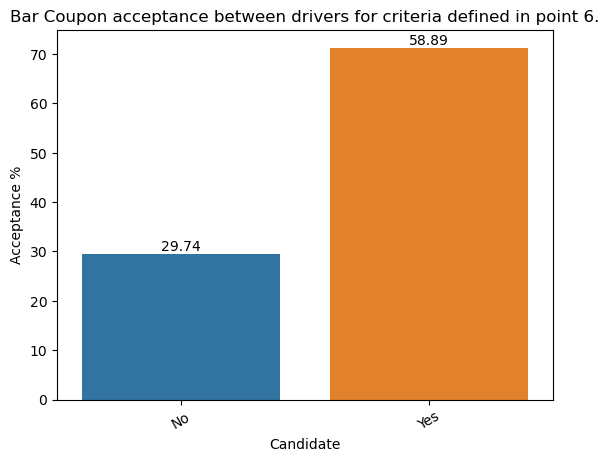

In [221]:
#Plot a graph to represent the acceptance
sns.barplot(x=bar_coupon_data_copy["candidate"],y=bar_coupon_data_kid["acceptance_percentage"])
plt.bar_label(bars,np.round(bar_coupon_data_copy["acceptance_percentage"],decimals=2))
plt.xlabel("Candidate")
plt.ylabel("Acceptance %")
plt.title("Bar Coupon acceptance between drivers for criteria defined in point 6.")
plt.xticks(rotation=30)

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

- You are twice as likely to accept a Bar coupon if you are:
    - frequent the bar more than three times a month, or
    - above 25 years of age and frequent the bar more than once a month
    - frequent the bar more than once a month, and are not employed in the Farming, Fishing, or Forestry industry, and also happen to not be travelling with kids as passengers.
    - frequent cheap resturants more than 4 times a month and earn less than 50K
- Overall, there seems to be strong correlation between the number of times you visit a bar and your likelihood of accepting a bar coupon

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [207]:
# Finding Percentage acceptance for all kinds of coupons
coupons_aggregates = coupon_data.groupby("coupon").agg({"coupon": 'size', 'coupon_accepted':'sum'})
coupons_aggregates.rename(columns={"coupon":"total_count","coupon_accepted":"acceptance_count"},inplace=True)
coupons_aggregates = coupons_aggregates.reset_index()
coupons_aggregates["acceptance_percentage"] = coupons_aggregates["acceptance_count"]/coupons_aggregates["total_count"]*100
coupons_aggregates

,coupon,total_count,acceptance_count,acceptance_percentage
0,Bar,2010,824,40.995025
1,Carry out & Take away,2344,1720,73.378840
2,Coffee House,3989,1989,49.862121
3,Restaurant(20-50),1488,657,44.153226
4,Restaurant(<20),2779,1967,70.780856


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Bar'),
  Text(1, 0, 'Carry out & Take away'),
  Text(2, 0, 'Coffee House'),
  Text(3, 0, 'Restaurant(20-50)'),
  Text(4, 0, 'Restaurant(<20)')])

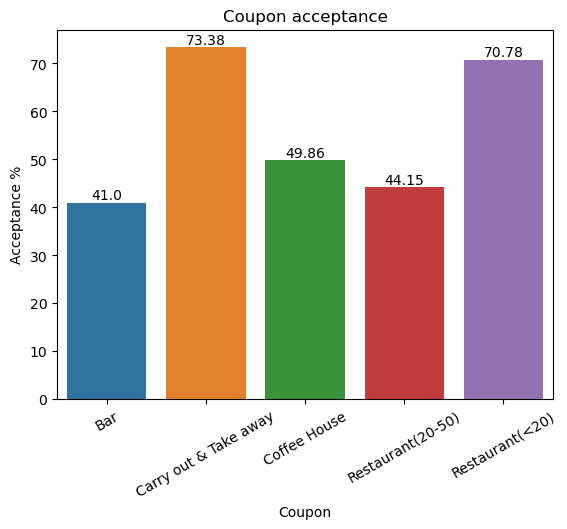

In [217]:
sns.barplot(coupons_aggregates, x="coupon", y="acceptance_percentage")
plt.bar_label(bars,np.round(coupons_aggregates["acceptance_percentage"],decimals=2))
plt.xlabel("Coupon")
plt.ylabel("Acceptance %")
plt.title("Coupon acceptance")
plt.xticks(rotation=30)

**Observation:** Based on the above graph, we can clearly see that Carryout and Take Away and Restaurant(<20) coupons get used the most while Bar coupons get used the least.

### Observation summary

- Carryout and Take Away and Restaurant(<20) coupons get used the most while Bar coupons get used the least.

- You are twice as likely to accept a Bar coupon if you are:
    - frequent the bar more than three times a month, or
    - above 25 years of age and frequent the bar more than once a month
    - frequent the bar more than once a month, and are not employed in the Farming, Fishing, or Forestry industry, and also happen to not be travelling with kids as passengers.
    - frequent cheap resturants more than 4 times a month and earn less than 50K
- Overall, there seems to be strong correlation between the number of times you visit a bar and your likelihood of accepting a bar coupon
